Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 3.30E-01
	diameter = 1.0E-01, distance = 5.08E-02
	diameter = 1.0E-02, distance = 1.01E-02
	diameter = 1.0E-03, distance = 3.99E-03
Done!


Convergence Order:0.6449007984803399 prefactor K:0.2661613274238739


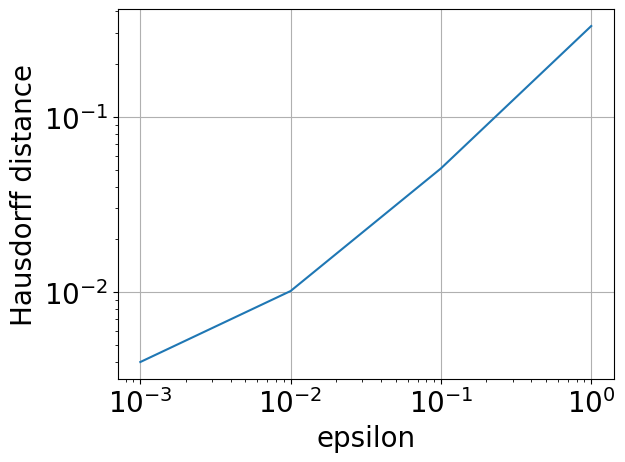

Process executed


In [1]:
from graphing.helper import convergence_analysis
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
from NSPLIB.src.instances.process.process_SP import const_model
process_obj = -1126.4218270121305
process_sol = {"x1":1727.2601809997955,"x2":16000,"x3":104.23841082714829,"x5":2000}
process_y_bound = {"x1":[10,2000],"x2":[0,16000],"x3":[0,120],"x5":[0,2000]}
sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
alg=LagrangeanAlgo(m,solver="baron",lag_iter=200)
convergence_analysis(alg,process_sol,process_obj,start=-3,stop=0,steps=4,name="Process")
print("Process executed")